Optimización en 1D
====

Objetivos:
---

2. Depurar problemas comunes al definir funciones, lo cual es esencial para la optimización.
3. Ser capaz de identificar problemas convexos y entender sus complejidades.
4. Aprender los dos métodos estándar para minimización y cómo utilizarlos en Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Elegir qué método usar
----

Hay cinco aspectos a considerar al realizar una optimización:

1. ¿Es en una dimensión o en N dimensiones?
2. ¿Estás minimizando o maximizando?
3. ¿Existen restricciones?
4. ¿Hay límites?
5. ¿Es convexo o no convexo?

Convexidad
====

Si un problema tiene más de un mínimo (donde la derivada es 0), entonces el problema es no convexo. **Lo opuesto a convexo es no convexo. Una función cóncava puede hacerse convexa con un signo negativo. Una función no convexa no puede hacerse convexa**.

Para identificar la convexidad se pueden utilizar:

* Gráficas
* Ejecutar una optimización convexa desde dos posiciones iniciales diferentes y obtener mínimos distintos
* Conocer algo específico sobre el problema

Consideremos una función con dos mínimos:

In [2]:
def two_well(x):
    if x < 0.125:
        return (x + 2) ** 2
    if x >= 0.125:
        return (x - 2) ** 2 + 1
    
np_two_well = np.vectorize(two_well)

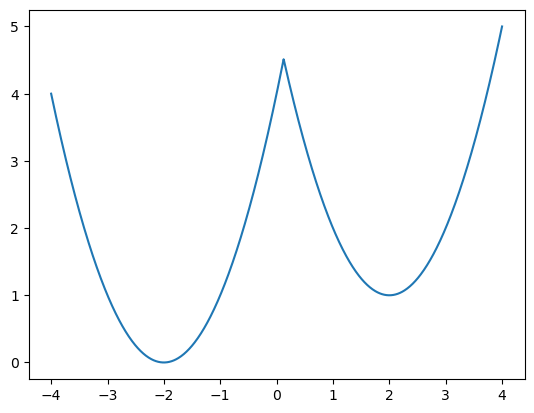

In [3]:
x = np.linspace(-4, 4, 1000)
plt.plot(x, np_two_well(x))
plt.show()

Optimización BFGS - Minimización
====
Broyden–Fletcher–Goldfarb–Shanno

**Tipo:** Minimización

**Discreto/Continuo:** Continuo

**Dimensiones:** N

**Derivada:** opcional

**No Convexo:** no recomendado

**Python:** `minimize` si no se dan restricciones o límites

Para converger a un minimo este algoritmo utiliza el gradiente de la **función objetivo**. Si el usuario no proporciona el gradiente, se estima utilizando diferencias finitas. El método de Broyden-Fletcher-Goldfarb-Shanno (BFGS) generalmente requiere pocas llamadas a la función, incluso cuando se debe estimar el gradiente.



Nomenclatura
----

En optimización, se tiene una función llamada **función objetivo**. Esa es la que se está minimizando. Siempre devuelve un solo valor. A veces se le llama **ajuste**, **error**, **residuo** o **penalización**.

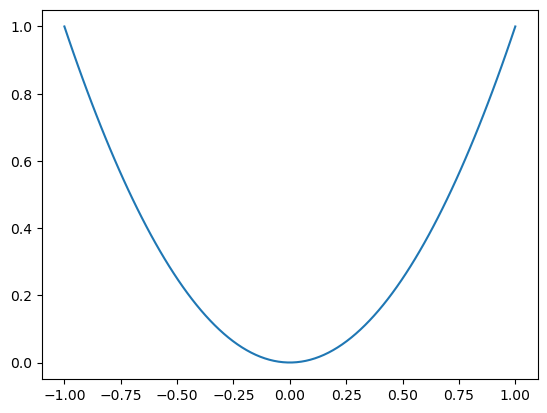

In [4]:
def obj(x):
    return x**2

x = np.linspace(-1,1,100)
plt.plot(x, obj(x))
plt.show()

In [5]:
from scipy.optimize import minimize

minimize(obj, x0=3, method='BFGS')

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.5388964258140254e-16
        x: [ 1.593e-08]
      nit: 2
      jac: [ 4.677e-08]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3

retorno de Minimize
----
- **message**: Una cadena de texto que describe lo que ocurrió
- **success**: Booleano que indica el éxito
- **status**: El mensaje de un solo dígito (0 = éxito, != 0 algún error)
- **fun**: El valor de la función en el mínimo
- **x**: El \(x\) mínimo
- **nit**: Número de iteraciones del punto \(x\)
- **jac**: El valor del Jacobiano
- **hess_inv**: La inversa de la Hessiana
- **nfev**: Número de evaluaciones de la función
- **njev**: Número de veces que se calculó el Jacobiano


Funciones Objetivo
===

Ten cuidado de que tu función objetivo sea *convexa* y que su mínimo no esté en $\infty$ or $-\infty$.

Una buena función objetivo
----

Minimizar la siguiente función:

$$f(x) = \frac{(x - 4)^2}{2} + \frac{(x - 2)^2}{4}$$

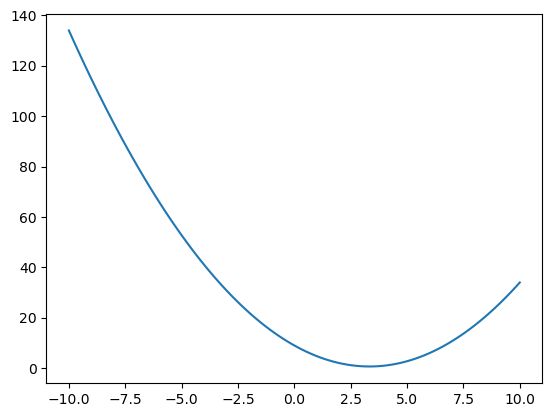

In [6]:
def f(x):
    return ((x-4)**2)/2+((x-2)**2)/4
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))
plt.show()

In [7]:
result = minimize(f, x0=0, method='BFGS')
print(f'el valor mínimo está aproximadamente en {result.x} y es {result.fun}')

el valor mínimo está aproximadamente en [3.33333336] y es 0.6666666666666674


Una mala función objetivo
----

Minimizar lo siguiente:

$$
f(x) = \frac{x - 4}{2}
$$

El minimo esta en $-\infty$!

In [8]:
result = minimize(lambda x: (x - 4) / 2, x0=0)
print(f'el valor mínimo está aproximadamente en {result.x} y es {result.fun}')

el valor mínimo está aproximadamente en [-1.69605906e+155] y es -8.480295277477428e+154


/Users/alejandrovasquez/miniforge3/lib/python3.10/site-packages/scipy/optimize/_optimize.py:197: RuntimeWarning: overflow encountered in square
  return np.sum(np.abs(x)**ord, axis=0)**(1.0 / ord)
/Users/alejandrovasquez/miniforge3/lib/python3.10/site-packages/scipy/optimize/_optimize.py:197: RuntimeWarning: overflow encountered in square
  return np.sum(np.abs(x)**ord, axis=0)**(1.0 / ord)
/Users/alejandrovasquez/miniforge3/lib/python3.10/site-packages/scipy/optimize/_optimize.py:197: RuntimeWarning: overflow encountered in square
  return np.sum(np.abs(x)**ord, axis=0)**(1.0 / ord)
/Users/alejandrovasquez/miniforge3/lib/python3.10/site-packages/scipy/optimize/_optimize.py:197: RuntimeWarning: overflow encountered in square
  return np.sum(np.abs(x)**ord, axis=0)**(1.0 / ord)
/Users/alejandrovasquez/miniforge3/lib/python3.10/site-packages/scipy/optimize/_optimize.py:197: RuntimeWarning: overflow encountered in square
  return np.sum(np.abs(x)**ord, axis=0)**(1.0 / ord)
/Users/alejandr

Una buena función objetivo pero un mal `x0`
---

Minimizar la siguiente función:

$$4 \left[ r^{-12} - r^{-6} \right]$$

In [9]:
result = minimize(lambda r: 4 * (r**(-12) - r**(-6)), x0=0)
print(f'el valor mínimo está aproximadamente en {result.x}')

el valor mínimo está aproximadamente en [0.]


/var/folders/37/v9fb2sws5m7gs68kvlhg8tg40000gn/T/ipykernel_90014/1916183084.py:1: RuntimeWarning: divide by zero encountered in power
  result = minimize(lambda r: 4 * (r**(-12) - r**(-6)), x0=0)
/var/folders/37/v9fb2sws5m7gs68kvlhg8tg40000gn/T/ipykernel_90014/1916183084.py:1: RuntimeWarning: invalid value encountered in subtract
  result = minimize(lambda r: 4 * (r**(-12) - r**(-6)), x0=0)


¡Nuestro valor inicial no estaba en el dominio!

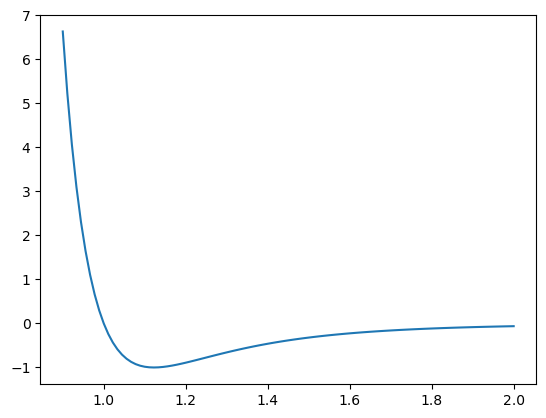

In [10]:
r = np.linspace(0.9, 2, 100)
y = 4 * (r**(-12) - r**(-6))
plt.plot(r, y)
plt.show()

In [11]:
result = minimize(lambda r: 4 * (r**(-12) - r**(-6)), x0=1)
print(f'el valor mínimo está aproximadamente en {result.x} y es {result.fun}')

el valor mínimo está aproximadamente en [1.12246208] y es -0.9999999999999768


Maximización
---

Para maximizar una función, simplemente añade un signo negativo.

Maximicemos la siguiente función:

$$
-\left[x - \cos(x)\right]^2
$$

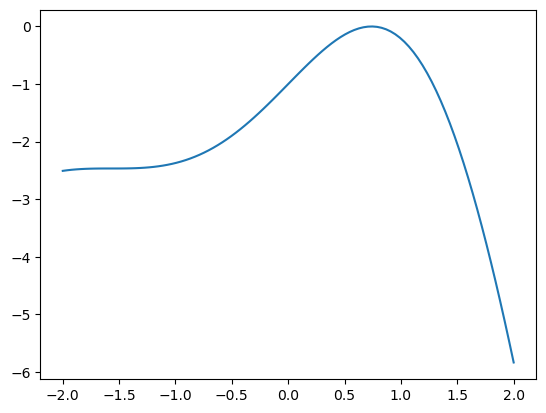

In [12]:
x = np.linspace(-2, 2, 100)
y = - (x - np.cos(x))**2
plt.plot(x, y)
plt.show()



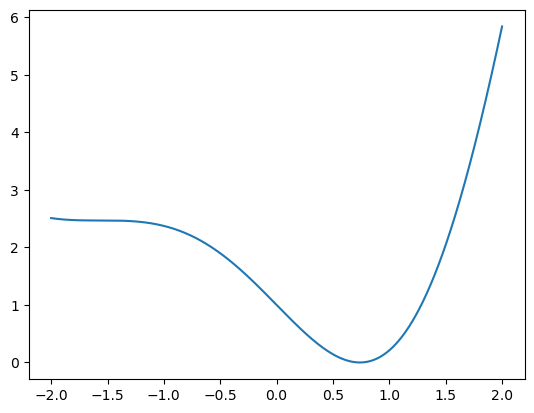

In [14]:
x = np.linspace(-2, 2, 10000)
y = (x - np.cos(x))**2
plt.plot(x, y)
plt.show()

In [15]:
#place - sign to make it a maxmimization problem
result = minimize(lambda x: (x - np.cos(x))**2, x0=2)
print(f'El maximo está en {result.x}')
print(f'la funcion es {result.fun}')

El maximo está en [0.73908544]
la funcion es 2.684343404326321e-13


Múltiples Dimensiones
----

Simplemente indica múltiples dimensiones utilizando un `x0` multidimensional. ¡Ten en cuenta que tu \(x\) se convierte en un vector!

Minimiza lo siguiente:

$$
f(x, y) = \frac{(x - 4)^2}{2} + \frac{(y + 3)^2}{5}
$$

In [16]:
result = minimize(lambda x: (x[0] - 4)**2 / 2 + (x[1] + 3)**2 / 5, x0=[0,0])
print(f'El máximo ocurre cuando x = {result.x[0]} ^ y = {result.x[1]}\)')

El máximo ocurre cuando x = 3.999999680451031 ^ y = -3.000008368343983\)


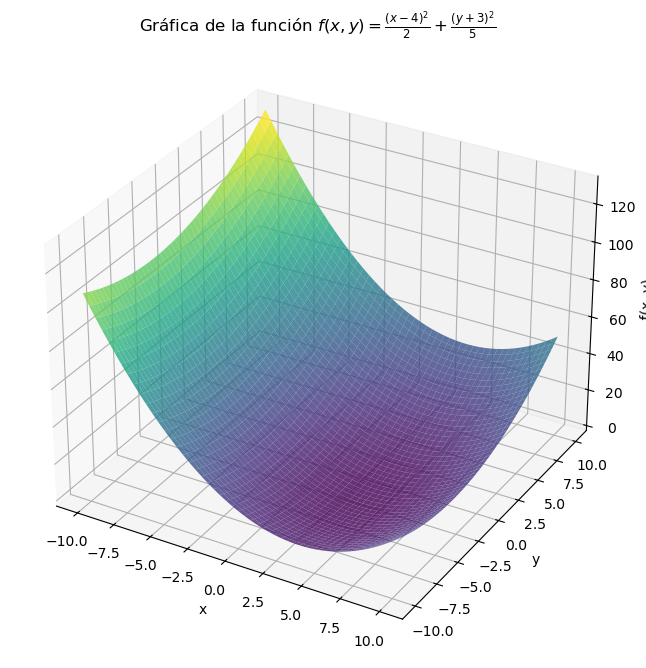

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definimos la función objetivo
def f(x, y):
    return ((x - 4)**2) / 2 + ((y + 3)**2) / 5

# Creamos un espacio de valores para x e y
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)

# Creamos una malla de valores para x e y
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Creamos la gráfica
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# Añadimos etiquetas y título
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Gráfica de la función $f(x, y) = \\frac{(x - 4)^2}{2} + \\frac{(y + 3)^2}{5}$')

# Mostramos la gráfica
plt.show()


Identificar la Convexidad para Minimización - Ejemplo
----

Las mejores formas de identificar la convexidad son:

* graficarla
* intentar optimizar desde múltiples posiciones iniciales

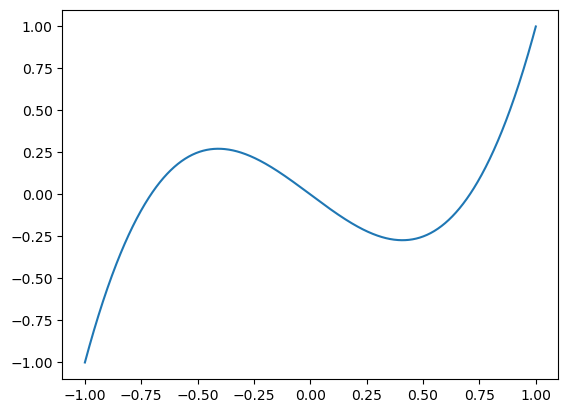

In [18]:
x = np.linspace(-1, 1, 1000)
plt.plot(x,  2 * x ** 3 - 0 * x **2  - x)
plt.show()

In [19]:
from scipy.optimize import minimize
minimize(lambda x:  2 * x ** 3 - 0 * x **2  - x, x0=0.4)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.2721655269737838
        x: [ 4.082e-01]
      nit: 2
      jac: [ 4.597e-06]
 hess_inv: [[ 2.062e-01]]
     nfev: 8
     njev: 4

In [20]:
from scipy.optimize import minimize
minimize(lambda x:  - 2 * x ** 3 + 0 * x **2 + x, x0=-0.38)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.27216552697590524
        x: [-4.082e-01]
      nit: 3
      jac: [ 2.235e-07]
 hess_inv: [[ 2.044e-01]]
     nfev: 10
     njev: 5

Optimización con Restricciones y No Convexa
====

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi
import scipy.optimize

Optimización No Convexa
====

Un problema extremadamente desafiante e irresoluble. No existe una herramienta de optimización no convexa de propósito general. Scipy utiliza un método bastante aceptable llamado "basin-hopping".

Basin-Hopping
====

**Tipo:** Wapper no convexo para minimizar

**Discreto/Continuo:** Continuo

**Dimensiones:** N

**Derivada:** opcional

**Convexo:** no requerido

**Python:** `basinhopping`

**Notas:** Pasa los argumentos de `minimize` con `minimizer_kwargs=min_args`, donde `min_args` es un diccionario de argumentos para la función `minimize`.

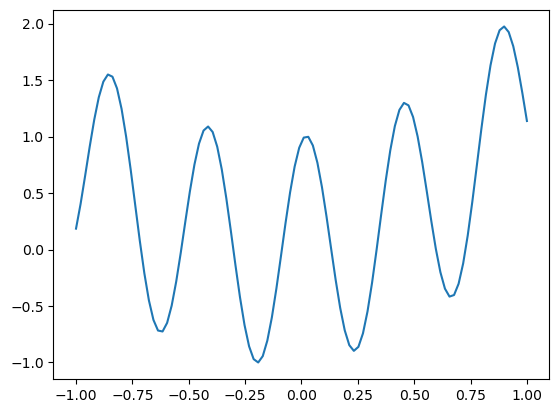

In [27]:
def non_convex(x):
    return np.cos(14.5 * x - 0.3) + (x + 0.2) * x

x = np.linspace(-1,1, 100)
plt.plot(x, non_convex(x))
plt.show()

In [33]:
ret = scipy.optimize.basinhopping(non_convex, x0=1, niter=100)
print(ret)

                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: -1.0008761844426555
                          x: [-1.951e-01]
                        nit: 100
      minimization_failures: 0
                       nfev: 1592
                       njev: 796
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: -1.0008761844426555
                                    x: [-1.951e-01]
                                  nit: 3
                                  jac: [ 1.639e-06]
                             hess_inv: [[ 4.712e-03]]
                                 nfev: 14
                                 njev: 7


Ten en cuenta que debes especificar el número de iteraciones a intentar. No hay forma de que "basin hopping" sepa que ha terminado. Por lo tanto, prueba con diferentes números de iteraciones y observa si cambia el resultado.

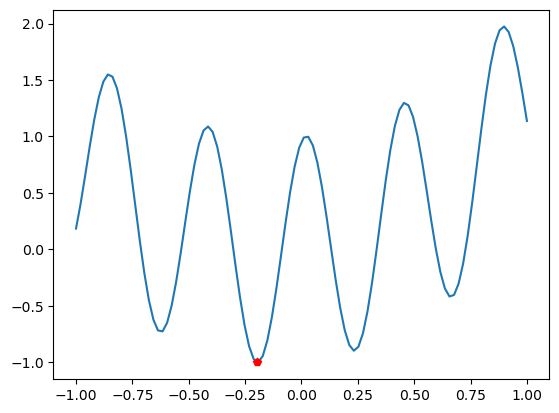

In [34]:
x = np.linspace(-1,1, 100)
plt.plot(x, non_convex(x))
plt.plot(ret.x, ret.fun, 'rp')
plt.show()

In [35]:
scipy.optimize.minimize(non_convex, x0=0.5)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.42166279553972497
        x: [ 6.634e-01]
      nit: 3
      jac: [ 3.353e-07]
 hess_inv: [[ 4.743e-03]]
     nfev: 16
     njev: 8

Optimización con Restricciones
====

A menudo queremos restringir el dominio de nuestra función objetivo. Veamos algunos casos.


Minimización en 1D con límites
====

Intentemos la *minimización* con $$\sin x$$ acotada en el intervalo $[-\pi, \pi]$

Programación Secuencial de Mínimos Cuadrados (SLSQP)
====

**Tipo:** Minimización acotada o acotada y con restricciones

**Discreto/Continuo:** Continuo

**Dimensiones:** N

**Derivada:** opcional

**Convexo:** sí

**Python:** `minimize` con argumento de límites

**Notas:** los límites se ven así: `bounds=[(min_1, max_1), (min_2, max_2), ...]`. Uno para cada dimensión.

In [37]:
scipy.optimize.minimize(lambda x: np.sin(x), x0=[0], bounds=[(-pi, pi)])

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -1.0
        x: [-1.571e+00]
      nit: 4
      jac: [ 0.000e+00]
     nfev: 12
     njev: 6
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

In [38]:
scipy.optimize.minimize(lambda x: np.sin(x[0]) * np.cos(x[1]), x0=[0, 0], bounds=[(-pi, pi), (-pi, pi)])

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -1.0
        x: [-1.571e+00  0.000e+00]
      nit: 4
      jac: [ 0.000e+00  0.000e+00]
     nfev: 18
     njev: 6
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

Minimización con Restricciones
====

Las restricciones son mucho más generales que los límites. Podemos utilizar números arbitrarios de restricciones de igualdad y desigualdad que deben cumplirse para obtener una solución.

Considera los puntos $x$ y $y$ que se encuentran en el círculo $$x^2 + y^2 = 1$$ Encuentra los valores de $x$ y $y$ que estén lo más cerca posible del punto \((3,4)\).

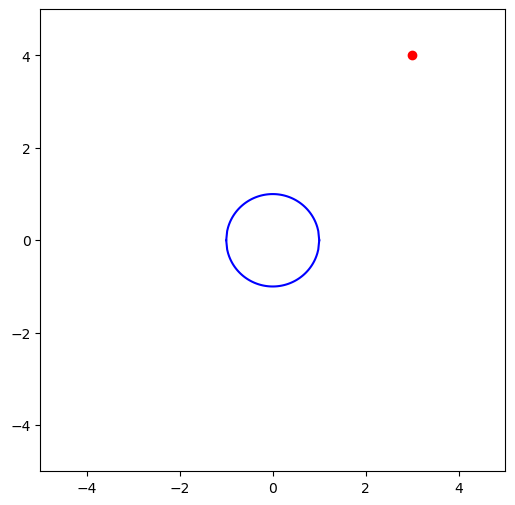

In [39]:
x = np.linspace(-1, 1, 100)

#make sure it's square
plt.figure(figsize=(6,6))

#have to plot the circle in two steps
plt.plot(x, np.sqrt(1 - x**2), color='blue')
plt.plot(x, -np.sqrt(1 - x**2), color='blue')

#now the point
plt.plot(3, 4, 'ro')

plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.show()

In [43]:
from math import sqrt

def dist(x1, x2):
    return sqrt(np.sum((x1 - x2)**2))

x1 = np.array([1,5])
x2 = np.array([-2,4])
print(dist(x1, x2))

3.1622776601683795


In [44]:
def circle(x):
    return x[0] ** 2 + x[1] ** 2 - 1

print(circle([0, 1]))

0


In [45]:
def obj(x):
    return dist(x, np.array([3,4]))
print(obj(np.array([2,4])))

1.0


In [46]:
my_constraints = {'type': 'eq', 'fun': circle}
result = scipy.optimize.minimize(obj, x0=[0,1], constraints=my_constraints)
print(result)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 3.9999999598752822
       x: [ 6.000e-01  8.000e-01]
     nit: 6
     jac: [-6.000e-01 -8.000e-01]
    nfev: 18
    njev: 6


(-5.0, 5.0)

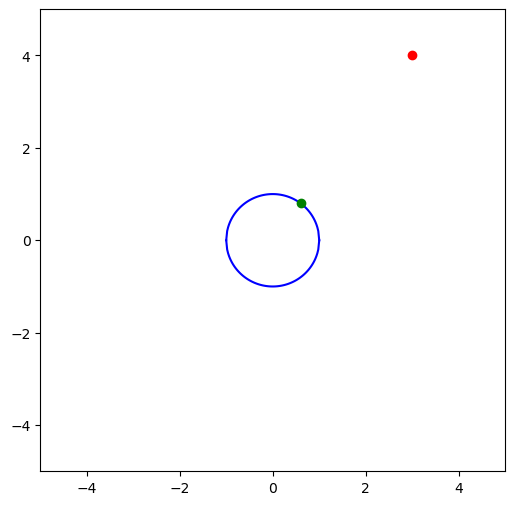

In [47]:
x = np.linspace(-1, 1, 100)

#make sure it's square
plt.figure(figsize=(6,6))

#plot the circle in 2 steps
plt.plot(x, np.sqrt(1 - x**2), color='blue')
plt.plot(x, -np.sqrt(1 - x**2), color='blue')
plt.plot(3, 4, 'ro')
plt.plot(result.x[0], result.x[1], 'go')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

L-BFGS-B
====

**Tipo:** Minimización con restricciones

**Discreto/Continuo:** Continuo

**Dimensiones:** N

**Derivada:** opcional

**Convexo:** sí

**Python:** `minimize` con argumentos de restricción